In [5]:
import pandas as pd 
import psutil
import json
import matplotlib.pyplot as plt
import functions as f 

In [3]:
PATH = 'realKnownCause/'
ERRORPATH = 'labels/combined_labels.json'
# load error data
with open(ERRORPATH, "r") as file:
    error_file = json.load(file)

In [6]:
file_names = f.get_all_files(PATH)

In [14]:
def load_and_mark_outliers(file_paths, error_path):
    # Load error data
    with open(error_path, "r") as file:
        errors = json.load(file)
    
    datasets = {}
    
    for file_path in file_paths:
        # Load data
        df = pd.read_csv(file_path, parse_dates=["timestamp"])
        df = df.sort_values(by='timestamp')
        # Load error data specific to the file
        df_error = errors.get(file_path, [])
        error_timestamps = set(pd.to_datetime(df_error))  # Convert to datetime for comparison
        
        # Mark outliers
        df["outlier"] = df["timestamp"].isin(error_timestamps).astype(int)
        datasets[file_path] = df
    
    return datasets

def plot_datasets(datasets):
    for file_path, df in datasets.items():
        plt.figure(figsize=(10, 5))
        
        # Plot non-outliers in blue, outliers in red
        plt.scatter(df.timestamp, df["value"], c=df["outlier"].map({0: "blue", 1: "red"}), label="Data")
        
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.title(f"Scatter Plot - {file_path}")
        plt.legend()
        plt.show()

# Example usage:
# file_paths = ["data1.csv", "data2.csv"]
# error_path = "errors.json"
# datasets = load_and_mark_outliers(file_paths, error_path)
# plot_datasets(datasets)


In [15]:
datasets = load_and_mark_outliers(file_names, ERRORPATH)

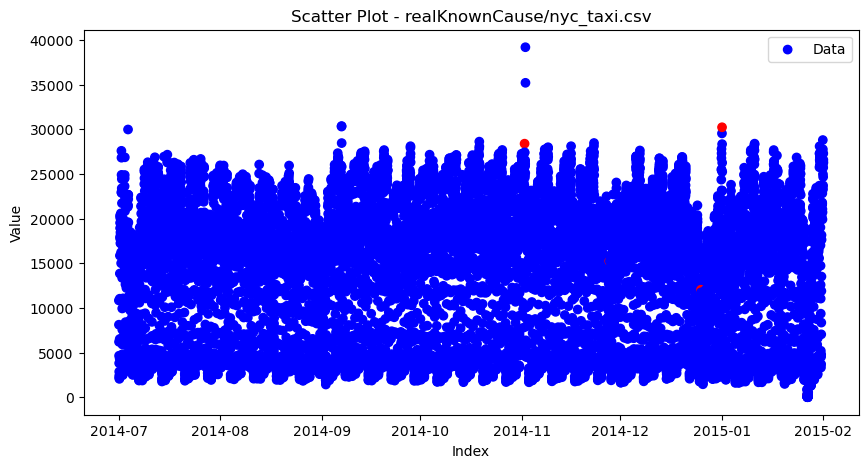

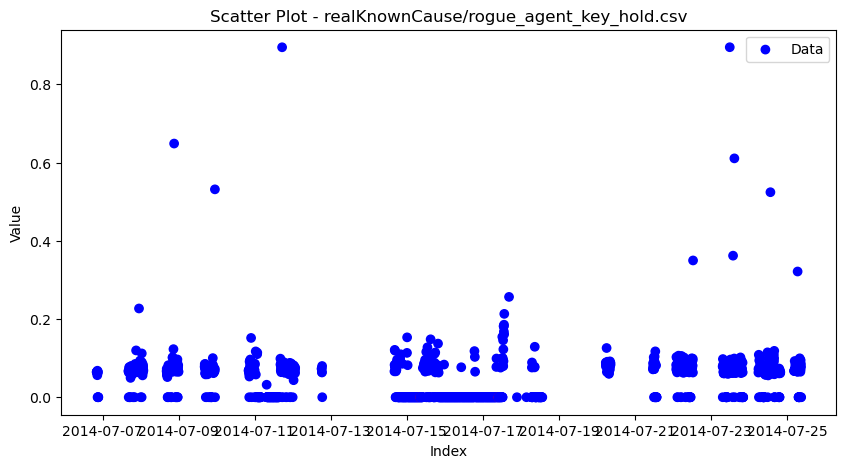

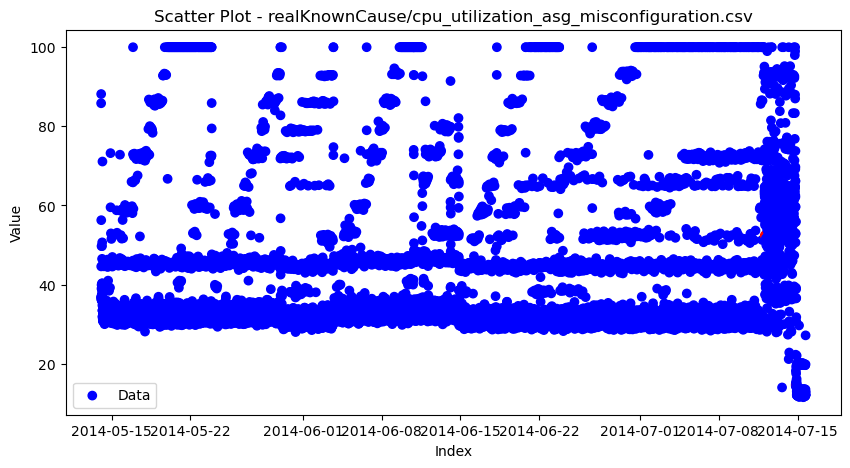

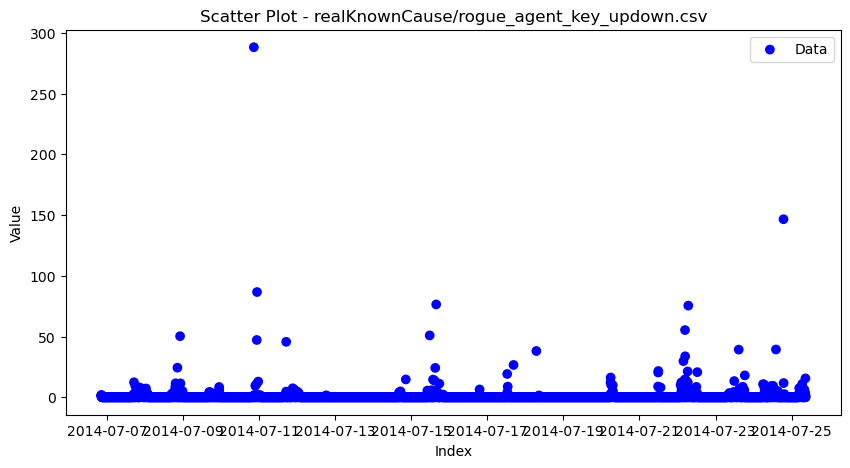

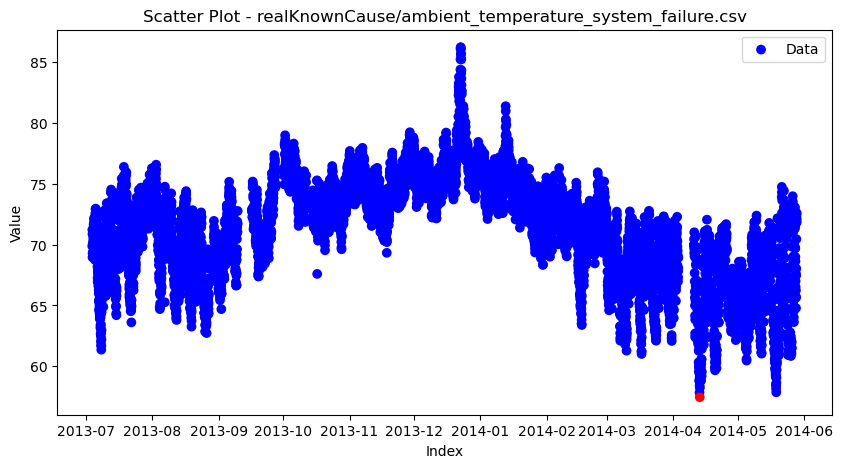

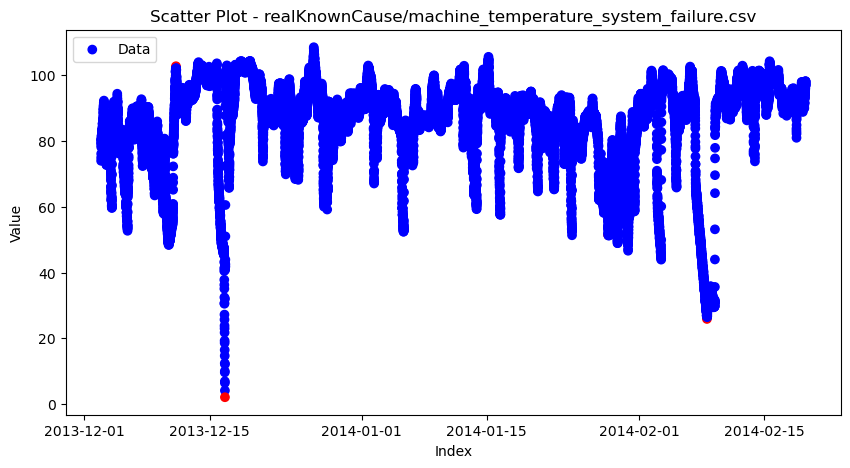

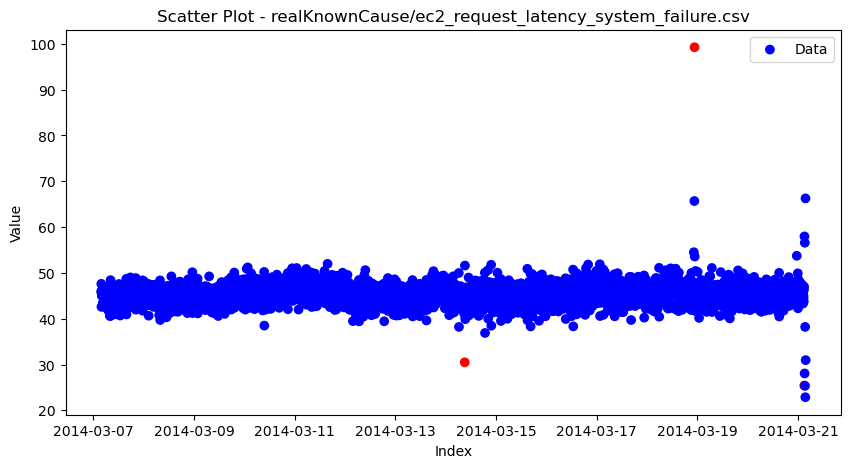

In [16]:
plot_datasets(datasets)